In [11]:
'''Importing Packages'''
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import dates
from IPython.display import Markdown as md
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
import datetime
from statsmodels.api import stats as sm
from loess import loess_1d
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from openpyxl import Workbook, load_workbook
from sklearn import linear_model
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from scipy.linalg import toeplitz
import math
import scipy.stats as stats
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
#from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
import calendar
from statsmodels.tsa.seasonal import seasonal_decompose
#import warnings
#from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning
#warnings.simplefilter('ignore', ConvergenceWarning, ValueWarning)
%matplotlib inline

\pagebreak

# Find the eight mysterious series $y_{1t}, ..., y_{8t}$ in the EXCEL file, mysticseries.xlsx. For each of the series,

## a. Plot the time-series plot, ACF and PACF. {-}

In [2]:
'''importing the data'''

mystic = pd.read_excel('mysticseries.xlsx', index_col='t')

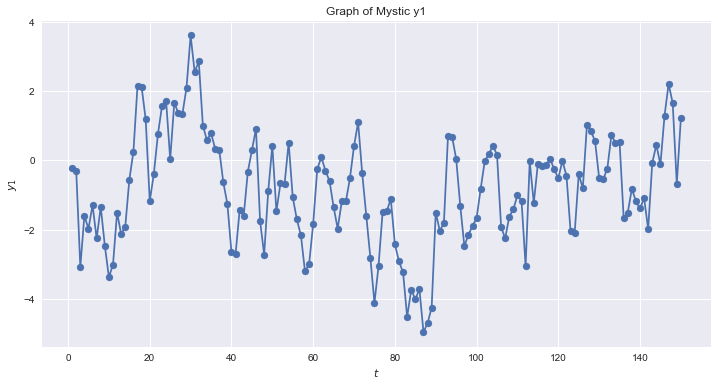

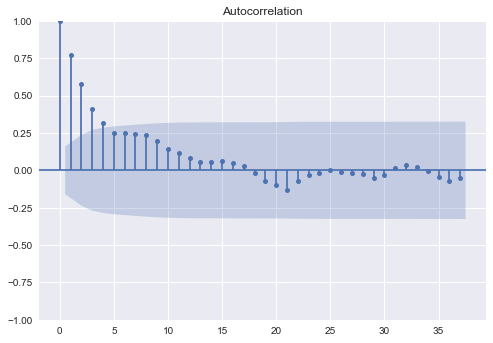

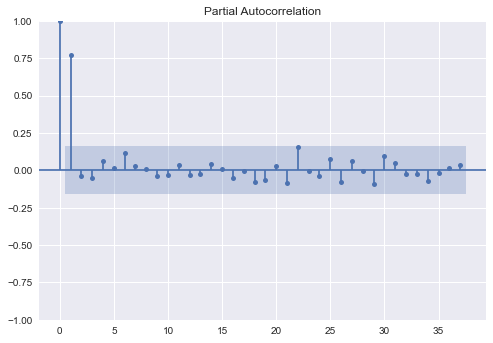

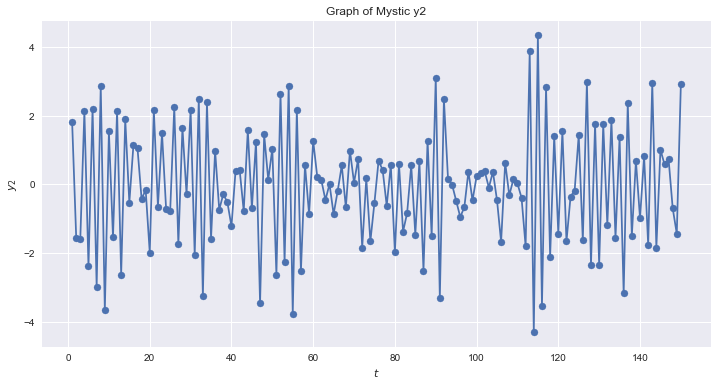

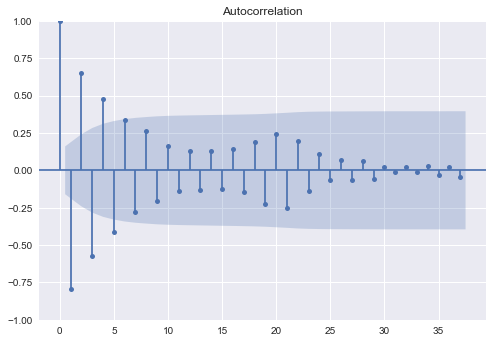

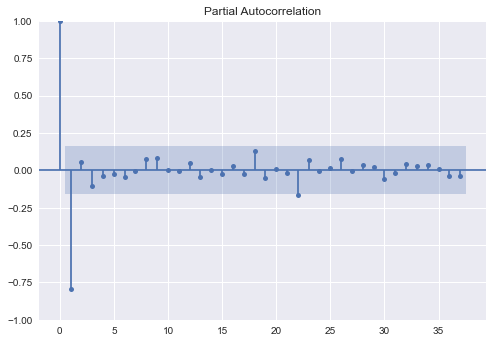

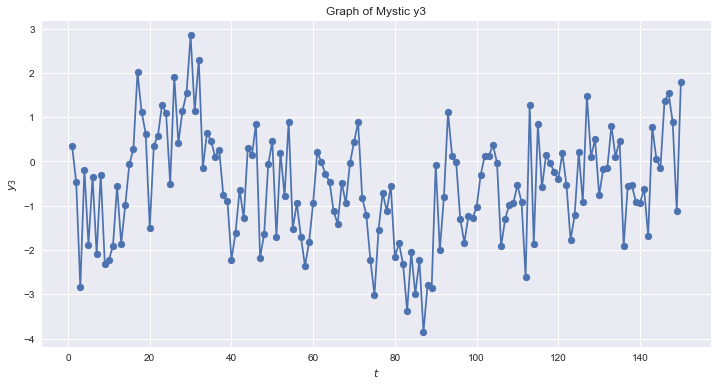

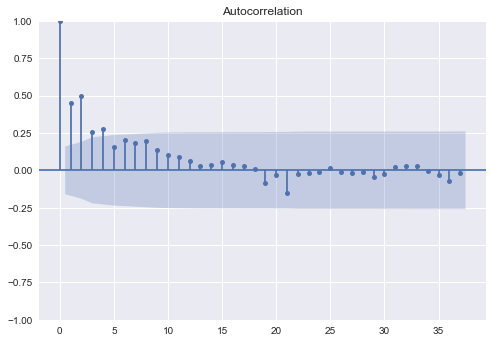

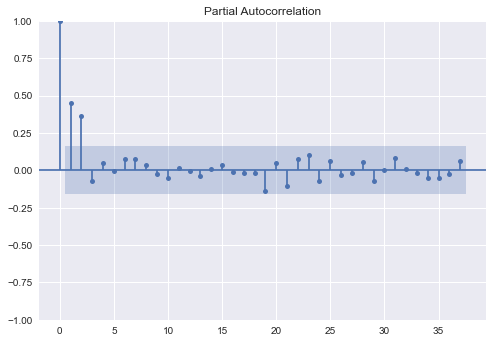

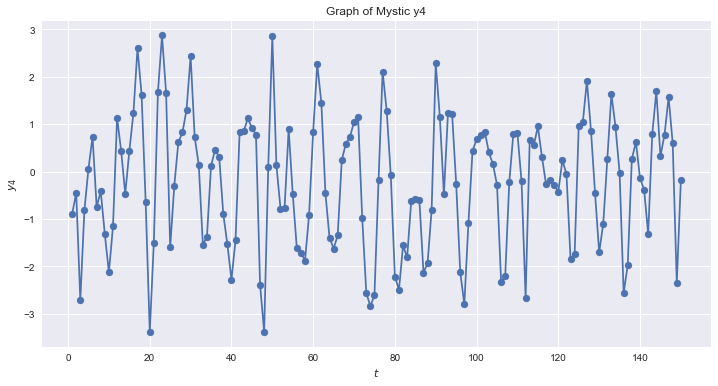

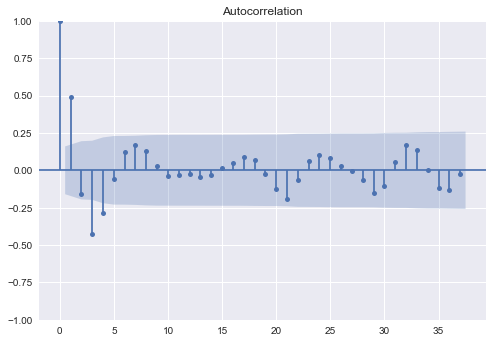

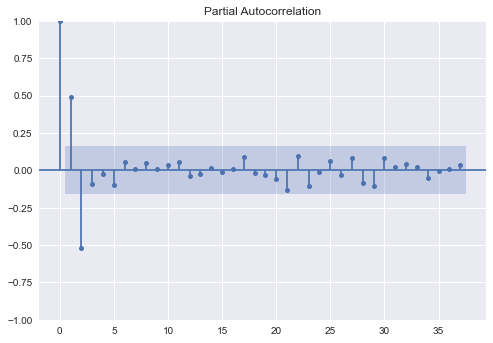

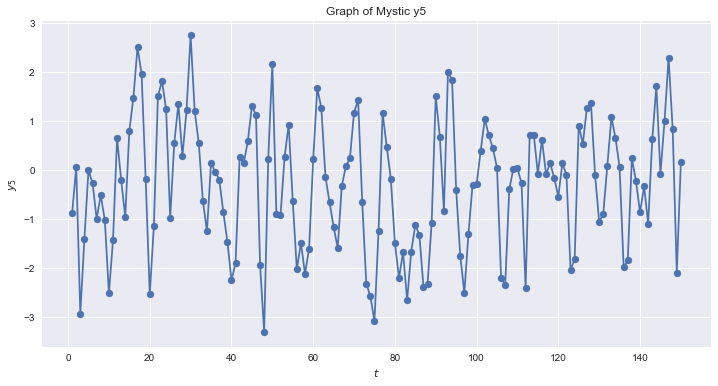

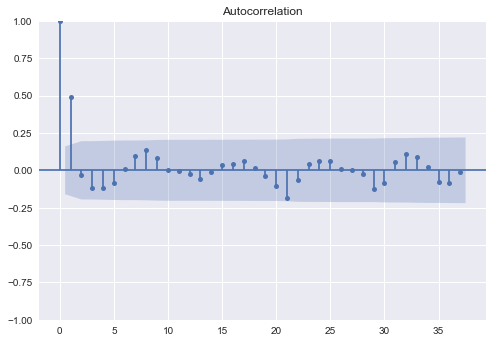

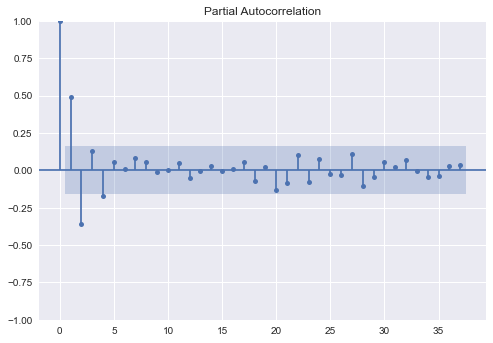

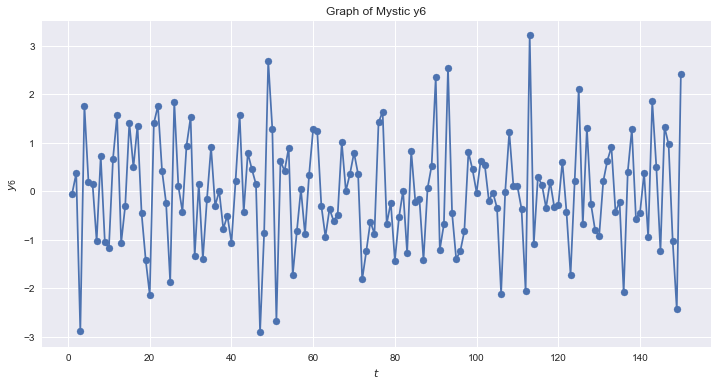

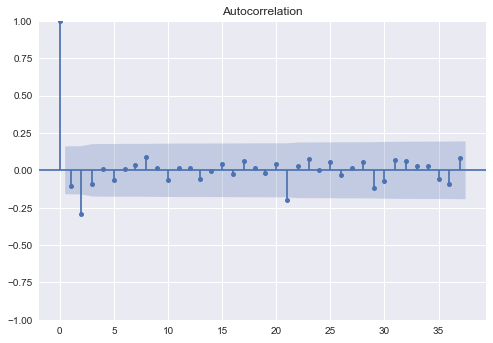

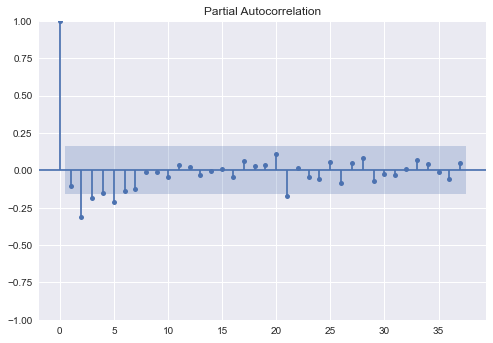

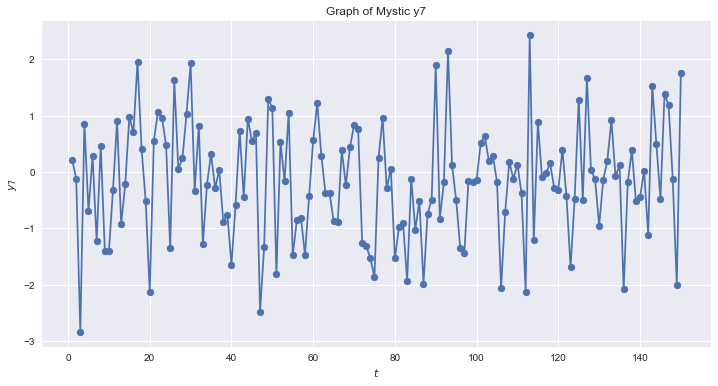

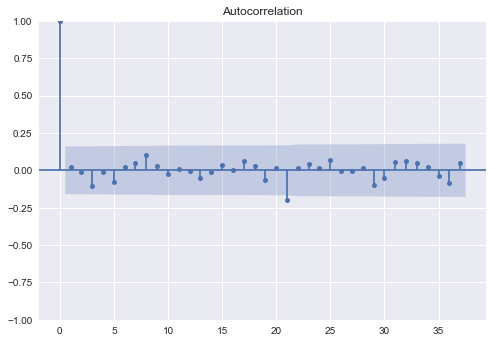

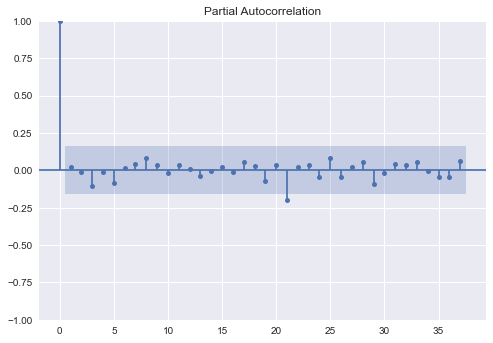

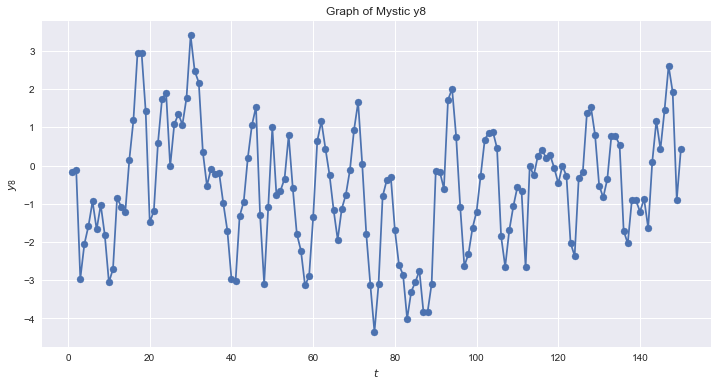

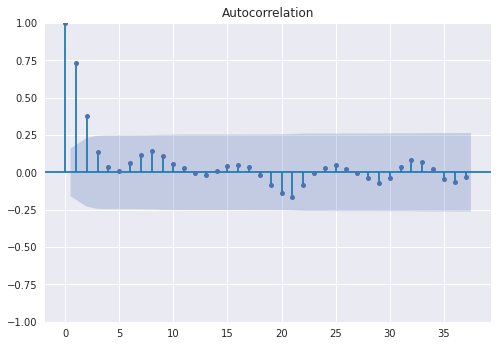

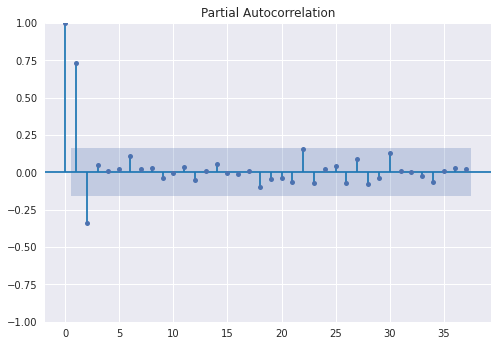

In [17]:
ysss = mystic.columns.tolist()
for i in range(len(ysss)):
    with plt.style.context('seaborn'):
        fig = plt.figure(figsize=(12,6))
        ax = plt.axes()
        plt.plot(mystic[ysss[i]])
        plt.scatter(x = mystic.index.tolist(), y = mystic[ysss[i]])
        plt.title('Graph of Mystic {}'.format(ysss[i]))
        plt.ylabel('$y_{}$'.format(i+1))
        plt.xlabel('$t$')
        plt.show()
    with plt.style.context('seaborn'):
        fig = plot_acf(mystic[ysss[i]], lags=int(len(mystic)/4))
    with plt.style.context('seaborn'):
        fig = plot_pacf(mystic[ysss[i]], lags=int(len(mystic)/4), method = 'ywm')

## b. Identify the corresponding ARIMA model. {-}